# NLP and the Web: Home Exercise 4

__Regarding type hints:__

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle and we will try to help you out. We provide type hints for function parameters and return values of functions that you have to implement in the tasks. These are suggestions only, and you may use different types if you prefer. As long as you produce the required output in a coherent and understandable way, you can get full points. We use the term 'array-like object' to loosely refer to collection types like lists, arrays, maps, dataframes, etc._

__Regarding Documentation__:

<i>Please use comments where appropriate to help tutors understand your code. This is especially important for the more extensive exercises later on. We also strongly encourage you to use type hints.</i>

__Regarding Output of Results__:

Please pay attention to output results (e.g. with `print()` or `display()`) when we ask you to in a task. It is your choice how you output results, but for dataframes we recommend the use of `display(df)`.

In [2]:
# for type-hinting
from numpy import ndarray
from typing import Union, List, Dict, DefaultDict, Set
# Bunch is a subtype of Dict, so the type-hints are comparable to Dict type-hints: Bunch[key, value]
from sklearn.utils import Bunch
from sklearn.datasets import fetch_20newsgroups

## Task 1: Inverted Index / Boolean Retrieval (5 Points)

__a)__ Next to many useful machine learning tools, __sklearn__ includes a collection of various datasets. In the ungraded practice notebook, you have already seen some examples on how to work with _20newsgroups_ ([dataset](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset), [loader](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)) which is a useful text corpus with numerous documents for a total of 20 different topics. For this notebook, we will use a selection of documents from the _20newsgroups_ dataset as our example corpus. Fetch all documents from _20newsgroups_ that adhere to the following parameters: 
- Include only documents of the 'test' subset and from the provided categories
- The documents should be shuffled with a random seed of 42
- Headers, footers and quotes should be removed  

To save some processing time in the following tasks, we want to further reduce our corpus. For this purpose, keep only the first 300 documents of the fetched result as your final corpus. Additionally, store the corresponding 300 target labels (categories) in a separate variable. 

In [4]:
categories: list[str] = ['alt.atheism', 'rec.sport.hockey']
newsgroups: Bunch[str, Union[list[str], ndarray, str]] = fetch_20newsgroups(subset='test',categories=categories,random_state=42,remove=('headers','footers','quotes'))
new_list=[]
new_list=newsgroups.data[:300]
news_targets: ndarray = newsgroups.target[:300]
#print(new_list[0])



__b)__ Implement a function `inverted_index` that receives a list of documents and returns an inverted index. An inverted index is a key-value mapping where each key is a unique word from the vocabulary of a given corpus of documents. Each key maps to a postings list that contains the indices of all documents in which the key word occurs in at least once. The index should cover only lemmatized tokens that fully consist of alphabetic characters. For lemmas/keys that are not covered by the corpus vocabulary, the resulting index should return an empty list (_hint_: defaultdict). You are also allowed to return an empty list for pronouns.

Use your function to create an inverted index for the corpus from task 1a) and output the postings lists for the terms "skate", "faith" and "pizza".
Only use __spaCy__ for tokenization, lemmatization and detection of alphabetic tokens!

In [5]:

!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 11.3 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import spacy
from collections import defaultdict
nlp: spacy.Language = spacy.load("en_core_web_sm")

In [7]:
def inverted_index(docs: Union[List[str], List[spacy.tokens.Doc]]) -> DefaultDict[str, List[int]]:
    """Create an inverted index for a given corpus of documents
    
    :param docs: array-like object containing documents
                 (List[spacy.tokens.Doc] or List[str] are only suggestions 
                  - you may choose either of both or another suitable type)
    :return: inverted index 
    """
    post_list=defaultdict(list)
    for i in range(len(docs)):
        doc=nlp(docs[i])
        doc_lemma=[]
        for token in doc:
            lemma=token.lemma_
            if lemma.isalpha() and lemma not in doc_lemma:
                doc_lemma.append(lemma)
                post_list[lemma].append(i)

    return post_list
        
posting_list=inverted_index(new_list)
print(len(posting_list))
        
        

5953


__c)__ Implement the optimized intersection function `intersect([t1, ..., tn])` for multiple AND queries from the lecture (slide 52). Try to keep the implementation as close as possible to the given pseudocode (see picture in the cell below).

Afterwards, create a function `boolean_retrieval` that takes a list of terms and interprets them as an AND query (e.g., the input ["best", "pizza", "pie"] should be interpreted as "best AND pizza AND pie"). The return value of the function should be a list of all document indices that contain all of the query tokens. 

Apply the function `boolean_retrieval` for the following queries and output the number of retrieved documents for each query:  

- best AND goals
- best AND goals AND overtime
- religions 
- most AND common AND religions

_Hints_: 

* Use the inverted index from the previous exercise to access the postings in lines 2 and 5 of the pseudocode. The function `intersect_(postings1, postings2)` that is used in line 5 of the pseudocode is already implemented for you. 
* You should pre-process the query within the function `boolean_retrieval`.

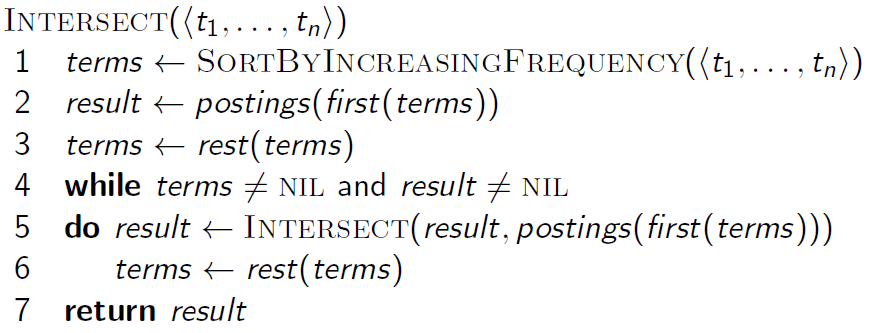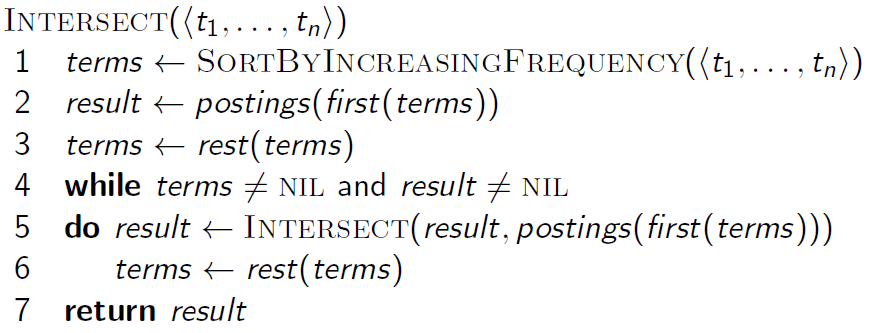

In [8]:
def intersect(terms: List[str]) -> List[int]:
    """Intersect the postings lists for multiple query terms as shown in the above pseudocode
    
    :param terms: array-like object containing terms, e.g. ['good', 'pizza', 'darmstadt']  
    :return: array-like object containing indices of documents in which all query terms occur 
    """
    sort_terms=sort_by_increasing_frequency(terms)
    result=posting_list[sort_terms[0]]
    del sort_terms[0]
    while len(sort_terms) !=0 and len(result)!=0:
        result=intersect_(result,posting_list[sort_terms[0]])
        del sort_terms[0]
    return result

        

def sort_by_increasing_frequency(terms: List[str]) -> List[str]:
    """Sort terms by the length of their postings lists. Used in line 1 of the pseudocode
    
    :param terms: array-like object containing terms
    :return: array-like object containing terms, ordered increasingly by their document frequency
    """
    sort={}
    result=[]
    for term in terms:
        sort[term]=len(posting_list[term])
    sort_list=sorted(sort.items(),key=lambda x:x[1])
    for i in range(len(sort_list)):
        result.append(sort_list[i][0])
    return result
    

def intersect_(postings1: List[int], postings2: List[int]) -> List[int]:
    """Intersect two (sub)lists containing postings. Used in line 5 of the pseudocode
    
    This function is already implemented and ready to use.
    
    :param postings1: array-like object containing the postings list of a term
    :param postings2: array-like object containing the postings list of a term
    :return: array-like object containing intersection of postings1 and postings2
    """
    return list(set(postings1) & set(postings2))

def boolean_retrieval(query: List[str]) -> List[int]:
    """Perform Boolean retrieval for a given query to determine all relevant documents
    
    :param query: array-like object containing query terms, e.g. ["my", "query"]
    :return: any object containing document indices that fulfill the conjunction of all query terms
    """
    lemma=[]
    for q in query:
        doc=nlp(q)
        lemma.append(doc[0].lemma_)
    terms_intersect=intersect(lemma)
    
    return terms_intersect
    

                    
    

terms=["attacks", "person", "personal"]
boolean_list=boolean_retrieval(terms)
print("boolean retrieval:",boolean_list)

boolean retrieval: [0, 282]


## Task 2: tf-idf (4 Points)

In the previous task you regarded a document as relevant for a query if it contained each of the queries' words at least once. However, this is not sufficient: Some word's might be more indicative of a document's content and some less (such as stop words). The former is the case for words that are 

* rare across the document collection and occur only in a few documents (--> high Inverse Document Frequency)
* frequent in the document at hand (--> high Term Frequency)

A method you learned in the lecture as well as in the ungraded tutorial notebook that leverages these ideas is tf-idf. It allows to reflect how important a specific word is to a document in a corpus. For doing so, it requires the transformation of documents into vector representations.

In this task, you will create the functionality to calculate tf-idf weights from scratch, turn the documents of our examplary corpus into tf-idf vector representations and use them to apply a simple text classification. As long as not stated otherwise, please do not use any other tools or libraries other than __math__, __numpy__ and __spaCy__ in task 2.

In [9]:
# useful imports for this task
import math
import numpy as np

__a)__ Implement a function `tf_weight(term, doc)`. For a given term and a document, the function should return the term frequency weight that is calculated with the following formula: 

&emsp;&emsp;&emsp;&emsp; $\text{tf-weight}_{\text{term,doc}} = 1 + \log_{10}(\text{tf}_{\text{term,doc}})$ &emsp;&emsp; $\text{if tf}_{\text{t,d}} > 0\text{, else }  0$

Implement a second function `idf_weights(docs)` that receives the corpus of documents and returns the idf weights for all words from the corpus vocabulary. Similar to task 1b), this vocabulary shall cover only the lemmas of alphabetic words (_hint:_ your inverted index function from the previous task can be very useful here). You do not need to remove stopwords. The idf weight for one term can be calculated like this: 

&emsp;&emsp;&emsp;&emsp; $\text{idf-weight}_{\text{term}} = \log_{10}(\frac{\text{#docs}}{\text{df}_{\text{term}}})$

In [10]:
def tf_weight(term: str, doc: Union[str, List[str]]) -> float:
    """Calculate term frequency weighting for a given term and document
    
    :param term: term string 
    :param doc: document
                (str or List[str] are only suggestions - you may choose either of both or another suitable type)
    :return: tf weight for the given term and document 
    """
    count=0
    t=nlp(term)
    for token in nlp(doc):            
        if t[0].lemma_ == token.lemma_:
            count+=1
    if count>0:
        tf_weight=1+(math.log(count,10))
    else:
        tf_weight=0
    return tf_weight

def idf_weights(docs: Union[List[str], List[spacy.tokens.Doc]]) -> Dict[str, float]:
    """Calculates inverse document frequency weighting for a corpus of documents.
    
    :param docs: array-like object containing documents
                 (List[spacy.tokens.Doc] or List[str] are only suggestions 
                  - you may choose either of both or another suitable type)
    :return: array-like object containing idf scores for all lemmas of the corpus vocabulary
    """
    total_list=[]
    idf={}
    idf_weight={}
    N=len(docs)
    for i in range(N):
        doc=nlp(docs[i])
        for token in doc:
            lemma=token.lemma_
            if lemma.isalpha() and lemma not in total_list:
                idf[lemma]=len(posting_list[lemma])
                total_list.append(lemma)

    for term in total_list:
        idf_weight[term]=math.log((N/idf[term]),10)
        
    return idf_weight

query_word="is"
document=new_list[0]
tf_w=tf_weight(query_word,document)
print("tf_weight:",tf_w)

idf_w=idf_weights(new_list)
print(idf_w)


                
                

tf_weight: 1.3010299956639813
{'personal': 1.4357285695614372, 'attack': 1.6989700043360185, 'deliberate': 2.477121254719662, 'misinterpretation': 2.477121254719662, 'of': 0.18045606445813128, 'a': 0.15697496860860838, 'person': 1.3979400086720375, 'statement': 1.2218487496163564, 'by': 0.5686362358410126, 'cut': 1.5740312677277186, 'out': 0.625862906000587, 'the': 0.08092190762392613, 'part': 1.1760912590556811, 'he': 0.5180798623985687, 'try': 1.0299632233774432, 'to': 0.13667713987954405, 'blunt': 2.477121254719662, 'thrust': 2.477121254719662, 'sentence': 1.8750612633916997, 'never': 0.9719712763997563, 'address': 1.7781512503836434, 'issue': 1.4771212547196624, 'extreemist': 2.477121254719662, 'peace': 1.7781512503836434, 'people': 0.7528453851188733, 'not': 0.380211241711606, 'hold': 1.1983676537668333, 'true': 1.154901959985743, 'their': 0.6320232147054056, 'ideal': 2.477121254719662, 'ignore': 1.3979400086720375, 'challenge': 2.176091259055681, 'that': 0.21230343171012592, 'for

__b)__  Implement a function `tf_idf_vectors(docs)` that transforms each document of a given corpus into a tf-idf vector representation. Each vector should be |V|-dimensional (where again V is the corpus vocabulary consisting of all alphabetic word lemmata). In other words, each vector entry represents one word from the corpus vocabulary; for each term in a document, the corresponding entry in the document's vector should be the tf-idf weight. If a term does not occur in a document at all, the corresponding vector entry should be 0.

Use the function to determine the tf-idf vector representations of all documents in our exemplary corpus from task 1a). Normalization of the tf-idf values is not required here.

In [ ]:
def tf_idf_vectors(docs: Union[List[str], List[spacy.tokens.Doc]]) -> List[ndarray]: 
    """Calculate tf-idf-vectors for the given documents
    
    :param docs: array-like object containing documents
                 (List[spacy.tokens.Doc] or List[str] are only suggestions 
                  - you may choose either of both or another suitable type)
    :return: array-like object containing tf-idf-vectors for each document"""
    
    total_list=[]
    tf_idf_v=[]
    for i in range(len(docs)):
        doc=nlp(docs[i])
        for token in doc:
            lemma=token.lemma_
            if lemma.isalpha() and lemma not in total_list:
                total_list.append(lemma)
                
    vector=np.zeros((len(total_list),len(docs)))
    for i in range(len(total_list)):
        for j in range(len(docs)):
            vector[i][j]=tf_weight(total_list[i],docs[j])*idf_w[total_list[i]]
        tf_idf_v.append(total_list[i])
        tf_idf_v.append(vector[i])
    return tf_idf_v
tf_idf_vec=tf_idf_vectors(new_list)
print(tf_idf_vec[0])

## Task 3: Ranked Retrieval and Evaluation (11 Points)

In task 2 you performed binary classification to find relevant documents for a given query. In other words, you dealt with the question _if_ a document is relevant for a query. In a real world scenario, however, relevance is not a binary decision, but a scale: some documents (for a query) may be more relevant than others. In other words, we want to answer _how_ relevant a query is. Search engines such as Google provide a solution to the latter question and hence display more relevant documents at the top of the search results (with a descending order of relevance). This is called __Ranked Retrieval__ and requires us to

1. use a method that rates search results on a scale (e.g. from 0 to 1) so that we can order them by their relevance (i.e. create a ranking)
2. use methods that allow us to evaluate the ranking we created in step 1.

After pre-processing the data in task 3a), we will use cosine similarity between query and document vectors as our "scale" by which we rank documents in task 3b). Thereafter, in tasks 3c) and 3d) we will compute precision, recall and 11-point-interpolated-precision to rate the ranking we computed in 3b). Lastly, we will plot the interpolated P-R curve to visualise our system's performance.

### About the data

The data is a subset of the CISI dataset. It comes with queries and documents, both from the computer science domain. It further provides annotation about which document is relevant for which query.

The data comes in three different files. All of them are `\t` separated:
* *queries.tsv:* consists of two columns.
    * The first column is the `id` (integer value)
    * The second column is the textual `query` (text)
* *docs.tsv:* consists of three columns.
    * The first column is the `id` (integer value)
    * The second column is the `title` of the document (text)
    * The third column is the `abstract` of the document (text).
* *mapping.tsv: consists of two columns.*
    * The first column is the `query_id` (integer)
    * The second column is the `doc_id`, which is the id of a relevant document for that query (integer)
    
Note that relevant documents do not exist for all queries, and that one document may be relevant to multiple queries.

### Getting Familiar with the Data

In general it is good practice to first take a closer look at the actual data you are working on.

Therefore, we output the DataFrames of all three files of the CISI dataset after loading them:

In [3]:
import pandas as pd
import spacy
nlp: spacy.Language = spacy.load("en_core_web_sm")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Load the data
queries_df: pd.DataFrame = pd.read_csv('queries_400.tsv', sep='\t')
documents_df: pd.DataFrame = pd.read_csv('documents_400.tsv', sep='\t')
mapping_df: pd.DataFrame = pd.read_csv('mapping_400.tsv', sep='\t')

In [13]:
queries_df

,id,query
0,1,What problems and concerns are there in making...
1,11,What is the need for information consolidation...
2,13,What criteria have been developed for the obje...
3,15,How much do information retrieval and dissemin...
4,19,Techniques of machine matching and machine sea...
5,20,Testing automated information systems.
6,22,Automated information in the medical field.
7,23,Amount of use of books in libraries. Relation ...
8,26,Cost and determination of cost associated with...
9,27,Computerized information retrieval systems. C...


In [14]:
documents_df

,id,title,abstract
0,58,Relevance Disagreements and Unclear Request Forms,Disagreements about the relevance of documents...
1,887,COM Catalog Based on OCLC Records,The production of a COM catalog using OCLC rec...
2,235,Book Catalogs,In the intervening years since the appearance ...
3,1435,International Standardization of Cataloguing a...,The ILFA Committee on Cataloguing has been at ...
4,675,Atom-by-Atom Typewriter Input for Computerized...,Novel features have been added to a paper tape...
...,...,...,...
395,260,Classification Practice in Britain. Report on...,The objectives of the Sub-Committee in startin...
396,148,Fair (Fast Access Information Retrieval) Proje...,I am going to describe in general terms a rese...
397,135,Design of Information Systems and Services,This review has selected for emphasis reports ...
398,830,Progress in Documentation,This article reviews the state of the art in a...


In [15]:
mapping_df

,query_id,doc_id
0,1,43
1,1,192
2,1,215
3,1,320
4,1,482
...,...,...
600,109,1285
601,109,1304
602,109,1341
603,109,1344


In [16]:
queries_df.columns.values.tolist()
documents_df.columns.values.tolist()
mapping_df.columns.values.tolist()

['query_id', 'doc_id']

Furthermore, we take a more thorough look at the query with `id=13`:

In [17]:
# Find claim and titles for query
_id: int = 13
print('Claim:', queries_df[queries_df['id'] == _id].iloc[0]['query'], '\n')

relevant_articles_df: pd.DataFrame = documents_df.merge(mapping_df, left_on='id', right_on='doc_id')
relevant_titles: pd.DataFrame = relevant_articles_df[relevant_articles_df['query_id'] == _id]

#display(relevant_articles_df)
# Sort
relevant_titles = relevant_titles.sort_values(by='id')

print('Relevant documents:')
for title in relevant_titles.loc[:, 'title']:
    print('*', title)
    
print('\nIn total:', len(relevant_titles))

Claim: What criteria have been developed for the objective evaluation of information retrieval and dissemination systems? 

Relevant documents:
* Adaptive Information Dissemination
* Opinion Paper
* MEDLARS: Report on the Evaluation of Its Operating Efficiency
* The Effectiveness of Automatically Generated Weights and Links in Mechanical Indexing
* Design and Evaluation of Information Systems
* Criteria for Evaluating Technical Library Effectiveness
* Document Delivery Capabilities of Major Biomedical Libraries in 1968: Results of a National Survey Employing Standardized Tests
* The SMART Automatic Document Retrieval System - An Illustration
* Communication among Scientists and Engineers
* Relevance Assessments and Retrieval System Evaluation
* The Cost_Performance of an On-Line, Free-Text Bibliographic Retrieval System
* Selected Results From An Inquiry Into Testing of Information Retrieval Systems
* Measures of the Usefulness of Written Technical Information to Chemical Researchers
*

### Visualisation

Visualizing the data can help to summarize textual information in a meaningful and compact way. We use seaborn in this case to visualize the amount of relevant documents per query:

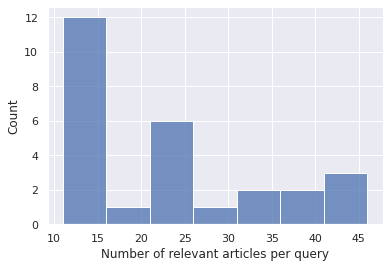

In [18]:
# Count relevant articles
relevant_document_counts: pd.DataFrame = mapping_df.groupby(by='query_id').count().reset_index()
#display(relevant_document_counts)
relevant_document_counts['Number of relevant articles per query'] = relevant_document_counts['doc_id']
#display(relevant_document_counts)   
sns.histplot(relevant_document_counts, x='Number of relevant articles per query', binwidth=5)
plt.show()# how many queries is 10-15/15-20/... relevant articles per query

### The Tasks

Task descriptions assume that you use pandas to store data. You are, however, free to use any other type of storage than dataframes.

**a)** Preprocessing:
Use spaCy to lemmatize the queries and documents.
* For queries, the `query` field must be lemmatized
* For documents, the concatenation of `title` and `abstract` must be lemmatized. We combine both fields (`title` and `abstract`) to simplify IR, by applying it on this single text for documents.

Store the lemmatized text in a separate column.

Finally output the preprocessed document with `id=1255`


In [4]:
len_query=len(queries_df)
lemma_list=[]
for i in range(len_query):
    lemma_list.append(" ".join([token.lemma_ for token in nlp(queries_df.iloc[i]['query'])]))
queries_df['lemma_query']=lemma_list
#display(queries_df)
 
title_list=[]
abstract_list=[]
lemma_document=[]
for i in range(len(documents_df)):
    title_list.append(" ".join([token1.lemma_ for token1 in nlp(documents_df.iloc[i]['title'])]))
    abstract_list.append(" ".join([token2.lemma_ for token2 in nlp(documents_df.iloc[i]['abstract'])]))

for i in range(len(title_list)):
    lemma_document.append(title_list[i]+' '+abstract_list[i])

documents_df['lemma_document']=lemma_document

display(documents_df[documents_df['id'] ==1255].iloc[:])







   

,id,title,abstract,lemma_document
89,1255,Report on the Testing and Analysis of an Inves...,This volume continues the account of the Aslib...,report on the Testing and Analysis of an inves...


**b)** In task 2 you had to implement TF-IDF on your own. However, sklearn already provides a very efficient implementation of this functionality. Therefore, you may use  [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) in this task.

Implement the function `compute_cosine_similarity_for_all`. It shall compute the cosine similarity of *all* queries with *all* documents, and add a label describing whether the document is relevant (`True`) to the query or not (`False`). It shall return a new dataframe and represent each `query`-`document` combination as one row.

**Example output:**

In [20]:
pd.DataFrame({
    'query_id': [99,99], # The same query is compared to ...
    'document_id': [1,2], # ... different documents. In your case to all documents.
    'document_title': ['Learn about IR in NLP4Web', 'Learn about nursing somewhere else'], # You can omit this - document_id is sufficient
    'query': ['Where can I learn more about IR?'] * 2, # You can omit this - query_id is sufficient
    'similarity': [0.349, 0.025], # Cosine similarity (These values are only an example and made up)
    'is_relevant': [True, False] # Gold Labels
})
# For all combinations of (query, document)

,query_id,document_id,document_title,query,similarity,is_relevant
0,99,1,Learn about IR in NLP4Web,Where can I learn more about IR?,0.349,True
1,99,2,Learn about nursing somewhere else,Where can I learn more about IR?,0.025,False


The function takes all data (queries, document, mapping) together with the vectorizer as input.
* The vectorizer (`vectorizer`) is a vectorizer (such as [`TfidfVectorizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from `sklearn`) and converts all texts into vectors.

The method should:
1. Fit the vectorizer *on the documents* (based on the preprocessed column).
2. Compute the vectors for all *queries* using the vectorizer from (1).
3. Compute the cosine similarity between all query- and all document-vectors. You can use the function [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) from `sklearn`.
4. Add label `is_relevant` describing for each combination of query-document whether the document is relevant to the query or not. Note that this label is independent of the computed cosine similarity score (check mapping_400.tsv instead).
5. Return the resulting dataframe. Make sure to include at least the ids for document and query, and the two newly introduced columns (`is_relevant`, `similarity`).

Apply the function to all preprocessed queries and all documents using the `TfidfVectorizer()` from `sklearn`.

Finally, show the titles of the ten most similar articles together with the similarity score and relevance for the query with `id=13`.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def compute_cosine_similarity_for_all(documents: pd.DataFrame, queries: pd.DataFrame, mapping: pd.DataFrame, 
                                      vectorizer: TfidfVectorizer) -> pd.DataFrame:
    """Compute cosine similarity for all query-document pairs
    
    :param documents: structure that contains document content
    :param queries: structure that contains query content
    :param mapping: structure that that contains mapping between queries and relevant documents
    :param vectorizer: TfidfVectorizer
    :return: DataFrame that contains cosine similarity for all query-document pairs
             (see example output above for how the DataFrame should look like)
    """
    doc_vector=vectorizer.fit_transform(documents['lemma_document'])
    q_vector= vectorizer.transform(queries['lemma_query'])
    
    cos_sim=cosine_similarity(q_vector,doc_vector)
   
    result=pd.DataFrame(columns=['query_id','document_id','similarity','is_relevant'])
    
    for count1,value1 in enumerate(queries['id']):
        for count2,value2 in enumerate(documents['id']):
            if value2 in mapping[mapping['query_id']==value1].values:
                result=result.append([{'query_id':value1,'document_id':value2,'similarity':cos_sim[count1][count2],'is_relevant':True}],ignore_index=True)
            else:
                result=result.append([{'query_id':value1,'document_id':value2,'similarity':cos_sim[count1][count2],'is_relevant':False}],ignore_index=True)
    return result
      
ccsfa=compute_cosine_similarity_for_all(documents_df, queries_df, mapping_df,TfidfVectorizer()) 
#display(ccsfa[ccsfa['query_id'] ==13].iloc[:])
    

In [6]:
ccsfa_sort=ccsfa.sort_values(by=['similarity'],ascending=False)
display(ccsfa_sort[ccsfa_sort['query_id'] ==13].iloc[:10])
for i in range(10):
    doc_id=ccsfa_sort[ccsfa_sort['query_id'] ==13].iloc[i]['document_id']
    display(documents_df[documents_df['id']==doc_id]['title'])

,query_id,document_id,similarity,is_relevant
848,13,611,0.323452,False
1114,13,1314,0.257048,False
844,13,1078,0.248873,False
1033,13,1136,0.247314,False
881,13,481,0.241303,False
934,13,731,0.224859,True
1197,13,135,0.223749,False
1193,13,49,0.216631,True
1084,13,59,0.216436,True
1095,13,523,0.216018,True


48    What Information Dissemination Studies Imply C...
Name: title, dtype: object

314    Popper's Mystification of Objective Knowledge
Name: title, dtype: object

44    Computerized Information Retrieval Services (A...
Name: title, dtype: object

233    Data Retrieval Systems:  Specifics and Problems
Name: title, dtype: object

81    Integrated Information Processing and the Case...
Name: title, dtype: object

134    Evaluation of an SDI Service Based on the Inde...
Name: title, dtype: object

397    Design of Information Systems and Services
Name: title, dtype: object

393    Adaptive Information Dissemination
Name: title, dtype: object

284    Opinion Paper
Name: title, dtype: object

295    The Cost_Performance of an On-Line, Free-Text ...
Name: title, dtype: object

**c)** Implement the function `precision_recall` to compute precision and recall for every row from the results of 3b). Precision and recall should be computed as discussed in the lecture for the P-R curve (without interpolation): Compute both metrics for each of the steps (top $1$ results, top $2$ results, ...., top $n$ results) and for each query (not aggregated yet). Assume that documents are ranked/retrieved according to the similarity score. Add the precision and recall values to the dataframe (or similar).

The input to this function should be the resulting dataframe from 3b). Apply it on the data.

Finally, show (similar to 3b) the top 10 results for the query with `id=13` together with the precision and recall metrics.

In [8]:
# Your code here
def precision_recall(similarity_results: pd.DataFrame) -> pd.DataFrame:
    """Compute precision and recall for each query for each of the steps (top 1 results, ...., top 𝑛 results)
    
    :param similarity_results: resulting DataFrame from 3b)
                               (contains information from all queries and not only the information from the query
                                with id=13)
    :return: structure that contains precision and recall for each query for each of the steps                      
    """
    
    
    query_id_list=[]
    result= pd.DataFrame()
    
    for query_id in similarity_results['query_id']:
        recall=[]
        precision=[]
        relevant=0
        
        if query_id not in query_id_list:
            doc_df=similarity_results[similarity_results['query_id']==query_id].sort_values(by=['similarity'],ascending=False)
            #display(doc_df)
            
            for i in range(len(doc_df)):
                judge=doc_df.iloc[i]['is_relevant']
                if judge==True:
                    relevant+=1
                precision.append(relevant/(i+1))
                recall.append(relevant/len(doc_df[doc_df['is_relevant']==True]))
           # print("#################",len(precision))
            doc_df['precision']=precision
            #print("######################",precision)
            doc_df['recall']=recall 
            #print("######################",recall)
            query_id_list.append(query_id)
            #display(doc_df)
            result = result.append(doc_df)
            #display(result)
    return result

p_r=precision_recall(ccsfa)

display(p_r[p_r['query_id']==13][:10])
    
        
    

,query_id,document_id,similarity,is_relevant,precision,recall
848,13,611,0.323452,False,0.000000,0.000000
1114,13,1314,0.257048,False,0.000000,0.000000
844,13,1078,0.248873,False,0.000000,0.000000
1033,13,1136,0.247314,False,0.000000,0.000000
881,13,481,0.241303,False,0.000000,0.000000
934,13,731,0.224859,True,0.166667,0.043478
1197,13,135,0.223749,False,0.142857,0.043478
1193,13,49,0.216631,True,0.250000,0.086957
1084,13,59,0.216436,True,0.333333,0.130435
1095,13,523,0.216018,True,0.400000,0.173913


**d)** Implement the function `precision_recall_11_point` for 11 point interpolation. It should compute interpolated precision values for all 11 recall levels and output them as a dataframe. Choose the first sample at which the recall $\geq$ recall_level to divide  your results into these 11 points. For example: When selecting samples for recall_level $0.1$ and you only have recall values of $[0.095, 0.112]$, then select the second point (recall $0.112$) as start for this recall level.

Apply this function on all queries, given the output of 3c) and output the precision values at each recall level of the 11-point interpolation for the query with `id=13`. 

In [9]:
# Your code here

def precision_recall_11_point(pr_similarity_results: pd.DataFrame) -> pd.DataFrame:
    """Perform 11 point interpolation on data in pr_similarity_results
    
    :param pr_similarity_results: resulting DataFrame from 3c)
    :return DataFrame that contains 11 point interpolations for all queries
    """
    result=pd.DataFrame(columns=['query_id','r_level','interpolated_precision'])
    query_id_list=[]
    for query_id in pr_similarity_results['query_id']:
        if query_id not in query_id_list:
            doc_df=pr_similarity_results[pr_similarity_results['query_id']==query_id]
            for i in range(11):
                recall=doc_df['recall']

                level=i*0.1
                precision=max(doc_df[doc_df['recall']>=(i*0.1)]['precision'])
                result=result.append([{'query_id':query_id,'r_level':level,'interpolated_precision':precision}])
                                      
            query_id_list.append(query_id)
    return result
            
pr_re_11=precision_recall_11_point(p_r)
display(pr_re_11[pr_re_11['query_id']==13])

,query_id,r_level,interpolated_precision
0,13,0.0,0.416667
0,13,0.1,0.416667
0,13,0.2,0.416667
0,13,0.3,0.342857
0,13,0.4,0.342857
0,13,0.5,0.342857
0,13,0.6,0.274510
0,13,0.7,0.149123
0,13,0.8,0.117647
0,13,0.9,0.107143


**e)** Plot the interpolated P-R curve based on all queries. (Use the result from 3d)

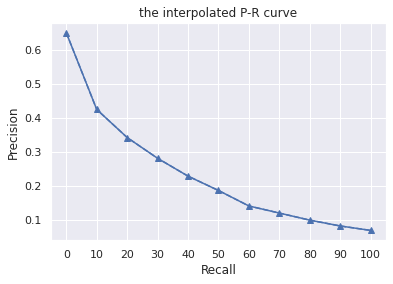

In [26]:
# Your code here
import numpy as np
mean_p=np.zeros(11)
query_id_list=[]
for query_id in pr_re_11['query_id']:
    if query_id not in query_id_list:
        doc_df=pr_re_11[pr_re_11['query_id']==query_id].sort_values(by=['r_level'])
        for i in range(11):
            mean_p[i]+=doc_df['interpolated_precision'].iloc[i]
        query_id_list.append(query_id)
mean_p=mean_p/27

X=np.linspace(0,100,11)
l=plt.plot(X,mean_p,'b--')
plt.plot(X,mean_p,'b^-')
plt.title("the interpolated P-R curve")
plt.xticks(np.linspace(0,100,11))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Please upload in Moodle your working Jupyter-Notebook <b>before next exercise session</b> <span style="color:red">(Jan 13th, 16:14pm)</span>. Submission format: Group_No_Exercise_No.zip<br>
Submission should contain your filled out Jupyter notebook template (naming schema: Group_No_Exercise_No.ipynb) and any auxiliar files that are necessary to run your code (e.g. datasets provided by us). <br>
Each submission must only be handed in once per group.